# Random numbers

We encounter randomness in many aspects of life in both explicit and implicit ways. The former can be seen clearly in the lottery and other games of chance that involve dice or the dealing of cards. We also encounter randomness in far more subtle ways such as the date of someone's birthday, the height of a small group of teenagers, or the number of raindrops that land in a cup during a summer shower.

While we often seek to identify or characterize patterns amidst randomness through data science, generating random numbers is in itself surprisingly useful for many aspects of data science and statistics. We frequently want to randomize the order of data or lists, randomly sample from a population, and employ randomness when creating simulations of possible real-world outcomes for scenario analyses. While there is a native Python library for generating [random numbers](https://docs.python.org/3/library/random.html), Numpy provides a versatile `random`[ module](https://numpy.org/doc/1.16/reference/routines.random.html) that has many helpful functions for generating random numbers and performing random sampling.

In this section, we will discuss how to generate random numbers and how we can use random numbers to randomly sample data from arrays.

## Generating random numbers
Before we talk about how to generate random numbers, we need to discuss the characteristics of random numbers, in particular, that random numbers follow different probability distributions depending on the random variable. You may have heard of a normal distribution which is also known as a Gaussian distribution or informally as a Bell curve (an example is shown in the figure below). Such a distribution has the property that when sampled from, the most likely (probable) values are those near the mean and become more unlikely the further from the mean that you get. The mean of the normal distribution shown in (a) below is zero. In that case, we're very likely to draw values close to zero, but extreme values (let's say 100) are going to be exceptionally rare.

![Probability Distributions](img/randomness.png)

We will start our exploration of random numbers with an even simpler distribution: the uniform distribution. Uniformly distributed numbers are between 0 and 1 and all values i that range are equally likely (equally probable that we draw them). We can easily create arrays of random numbers uniformly distributed between 0 and 1 using the `rand` method in the `numpy` `random` module. 

In [3]:
import numpy as np

a = np.random.rand(4)  # uniformly distributed numbers between 0 and 1
print(a)

[0.00527306 0.52572473 0.77093179 0.47865391]


The argument of `rand` tells you how many random numbers to include in the output array. If provide additional dimensions, this function creates a matrix of random numbers:

In [4]:
a = np.random.rand(4, 4)  # uniformly distributed numbers between 0 and 1
print(a)


[[0.912227   0.24064098 0.02554913 0.69158817]
 [0.18287849 0.56410786 0.56416012 0.86730408]
 [0.28458049 0.25617066 0.40736997 0.85397926]
 [0.73836284 0.45219681 0.51102196 0.29957092]]


A very common type of random number is a normal random number, as mentioned earlier. Using the technique we learned earlier to generate a histogram of the data, we can generate normally distributed random numbers just as easily as uniform random variables:

In [5]:
b = np.random.randn(4)  # Gaussian
print(b)


[-0.88547536  0.68268874 -0.14412031 -0.50347791]


If we produce a histogram of these values, as we discussed in a previous section, they follow a familiar normal distribution. Let's generate 10,000 normally distributed random numbers and produce a histogram of those values (this time using the built-in `numpy` `histogram` method](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)). The histogram takes the array of random numbers as input and the bins that we want to use for grouping the random numbers to evaluate their relative frequency.

In [6]:
# Generate an array of 10,000 random normal numbers
random_array = np.random.randn(10000)

# Output a histogram of the data with 10 bins
bins = np.arange(-3.5, 3.5, 0.25)
hist, bin_edges = np.histogram(random_array, bins=bins)


If we plot that histogram, we can see the distribution of these values clearly with a simple plot that reveals the familiar normal distribution structure of these random numbers, very common in nature and numerous social processes.

We will discuss plotting in detail in a later lesson in this series, for now, know that the histogram outputs the bin edges for value ranges used for counting how many random numbers fall into each range, so that's what we eliminate the final value of `bin_edges` from the plot and recenter the range of each bar by adding 0.125 to the x-axis value.

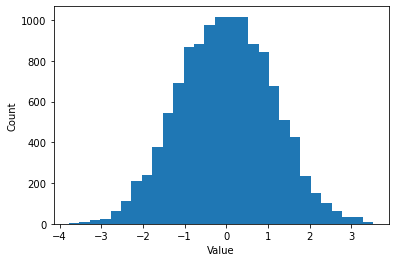

In [7]:
# Plot the results:
import matplotlib.pyplot as plt

plt.bar(bin_edges[:-1] + 0.125, hist)
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


As you can see, if we generate a standard normally-distributed random number, it's most likely to fall close to 0. Extreme values further from zero are far less.

If we rerun the code above and plot the histogram again, the histogram will be slightly different since the generated numbers will be different. While this is often beneficial, we sometimes want consistency between code runs in terms of the random numbers that are generated.

## Reproducible randomness

To demonstrate this clearly, let's run the code to generate our random numbers twice. We see that we get different values each time since the numbers are random.

In [8]:
b = np.random.randn(4)  # Gaussian
print(b)
c = np.random.randn(4)  # Gaussian
print(c)


[ 0.48922046  0.40045785  0.21448825 -1.75311409]
[0.57820418 0.34565377 0.99664075 0.54367221]


However, sometimes we don't want these values to change from run to run: for example, for reproducibility in a project, you may sometimes want your code to produce the same results each time. In such cases, this behavior isn't desirable. The way we can resolve this is by recognizing that random numbers generated by a computer are pseudo-random numbers. 

Pseudo-random numbers are sequences of numbers that *appear* random and have the statistical properties one would expect of the corresponding probability distribution (e.g. normal or uniform), however, they are based on a procedure that is deterministic based on some initial value. If you rerun the procedure using the same initial value, you get the same numbers. So the numbers aren't truly random but do a great job approximating random behaviors.

We can make use of this characteristic and fix our issue of reproducibility by setting what's known as a random seed. This generates our pseudo random numbers, but if the random seed is set (meaning the `np.rand.seed` function is called, setting the initial conditions of the pseudo random number generator), the code that follows it will produce the same random numbers each time it is executed. Below we demonstrate this by setting the random seed to a value of 42 (it doesn't matter what the seed is set to, as long as the two pieces of code have the same seed).

In [9]:
np.random.seed(42)  # Setting the random seed
b = np.random.randn(4)  # Gaussian
print(b)


[ 0.49671415 -0.1382643   0.64768854  1.52302986]


If we run it again (setting the same random seed), we get identical results.

In [10]:
np.random.seed(42)  # Setting the random seed
b = np.random.randn(4)  # Gaussian
print(b)


[ 0.49671415 -0.1382643   0.64768854  1.52302986]


## Random sampling
A very common need in data science is to randomly sample data. We may want to take a population and divide them up into a control and experimental condition for a randomized control trial. We may want to take the training data we have available for a machine learning application and divide it up into a training and validation set so that we can fairly evaluate the performance of our model. Whatever the case may be, this process requires randomization.

Let's start by discussing how we perform random sampling. Let's say we're trying to set up a randomized control trial and need to divide up a population of 20 into two groups of 10 each. 

In [11]:
ids = np.arange(20) # ID numbers for each member of the population we wish to sample from
print(ids)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


We can use Numpy's `shuffle` method in the `random` module to facilitate this. `shuffle` takes in a 1-D array and randomly reorganizes the order of its entries. We can then select up to the desired number of values for each group. Since `shuffle` operates on the data in place, it changes the order of the data in the original array (to avoid this, make a copy first).

In [12]:
ids_shuffle = ids.copy()
np.random.shuffle(ids_shuffle)
print(ids_shuffle)

[ 8 16  0 19 11  9 13  1 14  5  2 12 15  3  4  7 17 10 18  6]


Now we just divide them up into two arrays of 10 each and we have our random samples:

In [13]:
control = ids_shuffle[0:10]
experiment = ids_shuffle[10:]
print(control)
print(experiment)

[ 8 16  0 19 11  9 13  1 14  5]
[ 2 12 15  3  4  7 17 10 18  6]


Numerous other functions can be used for this. `numpy` also has the `choice` method which will sample randomly from a list with or without replacement. Scikit-learn has methods such as `train_test_split` which can divide the data into two sets and can even stratify the sampling based on the characteristics of the data. Unless you are looking for something very specific, there's likely a package or method ready for you to use.

You'll get some practice working with random numbers in the upcoming exercise.

## Recap
- Random numbers are useful tools for shuffling and sampling data and for constructing experiments and simulations
- Common uniform and normal random numbers can be generated as arrays of any size
- Care must be taken in randomness needs to be replicated through the setting of random seeds